In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from IPython.core.display import HTML

### Aligning data visualizations

The following code is used to center and align the visualizations laid out below.

In [2]:
HTML("""
<style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style>
""")

### Loading data

In [3]:
page_view = pd.read_csv("data/Salesforce/ELF/LightningPageView/2022-06-20_LightningPageView.csv")

user_data = pd.read_csv("data/Salesforce/ELF/User_all_sample.csv")

### Data manipulation to plot bar charts

The following code is applied to filter the first and last name of users ordered according to the **DURATION** and **EFFECTIVE_PAGE_TIME** parameters (the description of such parameters can be found in this [reference](https://developer.salesforce.com/docs/atlas.en-us.object_reference.meta/object_reference/sforce_api_objects_eventlogfile_lightningpageview.htm)).

In [4]:
merged_data = pd.merge(left = page_view, right = user_data, left_on='USER_ID_DERIVED', right_on='Id', how= 'inner')

amount_data = 20 # Amount of data specified for the bar plot axes.


data_dict1 = merged_data.groupby("Name")['DURATION'].sum() # Sum of DURATION data by username.
 
sorted_data_dict1 = {k: v for k, v in sorted(data_dict1.items(), key=lambda item: item[1], reverse = True)} #Sorting usernames by DURATION

y_axis1 = [ name.split()[0] + " " + name.split()[len(name.split()) -1] for name in list(sorted_data_dict1.keys())[:amount_data] ]

x_axis1 = list(sorted_data_dict1.values())[:amount_data]


data_dict2 = merged_data.groupby("Name")['EFFECTIVE_PAGE_TIME'].sum() # Sum of EFFECTIVE_PAGE_TIME data by username.

sorted_data_dict2 = {k: v for k, v in sorted(data_dict2.items(), key=lambda item: item[1], reverse = True)} #Sorting usernames by EFFECTIVE_PAGE_TIME

y_axis2 = [ name.split()[0] + " " + name.split()[len(name.split()) -1] for name in list(sorted_data_dict2.keys())[:amount_data] ]

x_axis2 = list(sorted_data_dict2.values())[:amount_data]


### Generating bar plot considering DURATION

The **DURATION** parameter represents the duration in milliseconds since the page start time. This field is being deprecated. The documentation recommends to use **EFFECTIVE_PAGE_TIME** instead.

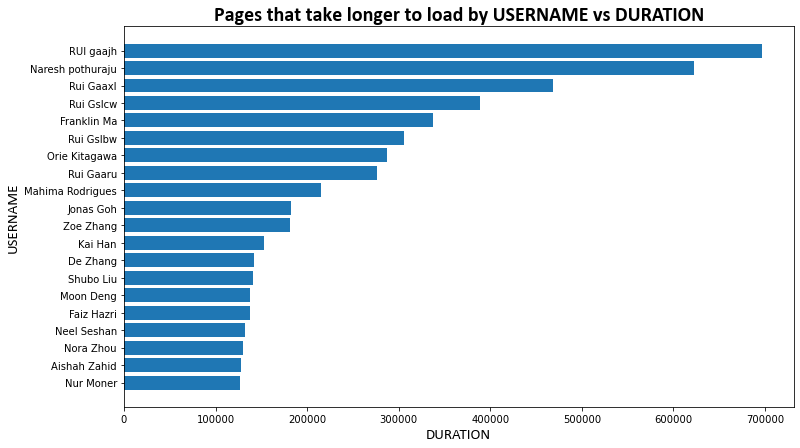

In [5]:

df = pd.DataFrame ({
        'name': y_axis1,
        'duration': x_axis1
})

df = df.sort_values(by=['duration'])

plt.figure(figsize=(12,7))


plt.barh(y=df.name, width=df.duration);

plt.xlabel('DURATION', fontsize=15, fontname="Calibri")
plt.ylabel('USERNAME', fontsize=15, fontname="Calibri")

plt.title('Pages that take longer to load by USERNAME vs DURATION', fontsize=20, fontweight="bold", fontname="Calibri");

plt.show()

### Generating bar plot considering EFFECTIVE_PAGE_TIME

The **EFFECTIVE_PAGE_TIME** parameter indicates how many milliseconds it took for the page to load before a user could interact with the page’s functionality. If an effective page time greater than 60 seconds is detected, the value of this field is set to null or 0. In this case other fields specify why pages take longer to load (EFFECTIVE_PAGE_TIME_DEVIATION, EFFECTIVE_PAGE_TIME_DEVIATION_ERROR_TYPE, and EFFECTIVE_PAGE_TIME_DEVIATION_REASON).

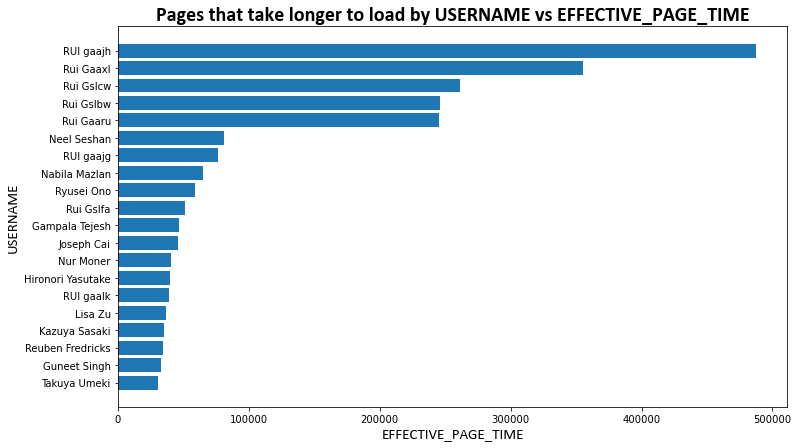

In [6]:
df2 = pd.DataFrame ({
        'name': y_axis2,
        'eff_pag_time': x_axis2
})

df2 = df2.sort_values(by=['eff_pag_time'])

plt.figure(figsize=(12,7))


plt.barh(y=df2.name, width=df2.eff_pag_time);

plt.xlabel('EFFECTIVE_PAGE_TIME', fontsize=15, fontname="Calibri")
plt.ylabel('USERNAME', fontsize=15, fontname="Calibri")

plt.title('Pages that take longer to load by USERNAME vs EFFECTIVE_PAGE_TIME', fontsize=20, fontweight="bold", fontname="Calibri");

plt.show()
